In [61]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import requests
import time
from bs4 import BeautifulSoup

df = pd.read_excel(r"UniversityData_Undergrads-Final.xlsx", sheet_name='Automated')

df.head()

Crname= df['Course Name'].values
Cwebsite = df['Course Website'].values
tag = df['Tag'].values
clname= df['Class Name'].values

found=[]
contents=[]
termsCount = []
digitization_terms = ['Advanced manufacturing','Artificial intelligence','Algorithms','Automation','Big data',
                      'Bitcoin','Blockchain','Blogs','Cybersecurity','Email','Information systems','Internet',
                      'Internet of things','IoT','Intranet','Machine learning','Privacy','Remote employees','Robotics',
                      'Social media','Software applications','Technology','Telecommuting','Videoconferencing','Virtual',
                      'augmented reality','Virtual teams','Wikis']





In [62]:
import matplotlib.pyplot as plt

In [63]:
df.shape

(32, 12)

In [64]:
df.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Tag', 'Class Name'],
      dtype='object')

In [65]:
df['Course Website'].dropna(inplace=True)

In [66]:
for i in range(len(Crname)):
    pageLink = Cwebsite[i]
    response = requests.get(pageLink, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',})
    html = response.content  # get the html
    time.sleep(2)  # wait 2 secs
    soup = BeautifulSoup(html.decode('ascii', 'ignore'), 'lxml')  # parse the html
    reviews = soup.findAll(tag[i], {'class': clname[i]})  # get all the review divs
    for review in reviews:
        content = review.text.lower()
        contents.append(content)
        flag=0
        terms=[]
        for each in digitization_terms:
            if each.lower() in content:
                terms.append(each.lower())
                flag=1
        if flag ==1:
            found.append(terms)
            termsCount.append(len(terms))
        if flag!=1:
            found.append('No Digitization Terms Found')       
            termsCount.append(0)
        
print(len(found))
print(len(contents))
print(len(termsCount))
        
newdf= df

newdf = newdf.drop(['Tag', 'Class Name'], axis=1)

newdf['Course Curriculum']= contents
newdf['Digitization Terms']=found
newdf['Terms Count']=termsCount

newdf.head()


32
32
32


,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,Digitization Terms,Terms Count
0,30.0,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,TO 433,Artificial Intelligence for Business,Elective,https://michiganross.umich.edu/courses/artific...,artificial intelligence for business --- we ar...,[artificial intelligence],1
1,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,NaN,TO 435,Behavioral Economics and Behavioral Operations,Elective,https://michiganross.umich.edu/courses/behavio...,behavioral economics and behavioral operations...,No Digitization Terms Found,0
2,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,NaN,MO 300,Behavioral Theory in Management,Core,https://michiganross.umich.edu/courses/behavio...,behavioral theory in management --- this cours...,No Digitization Terms Found,0
3,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,NaN,BL 300,Business Law and Ethics,Core,https://michiganross.umich.edu/courses/busines...,business law and ethics --- this is a core cou...,No Digitization Terms Found,0
4,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,NaN,BL 310,Negotiation and Dispute Resolution,Elective,https://michiganross.umich.edu/courses/negotia...,negotiation and dispute resolution --- the abi...,No Digitization Terms Found,0


In [67]:
import pandas as pd

In [68]:
df2 = pd.read_excel(r"UniversityData_Undergrads-Final.xlsx", sheet_name='Manual')
df2.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum
0,1.0,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,Management: General Track BS,MGMT 238,Organizational Behavior,Core,https://catalog.upenn.edu/search/?P=MGMT%20238,Management 238 is an organizational behavior c...
1,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 111,Multinational Management,Elective,https://catalog.upenn.edu/search/?P=MGMT%20111,Most successful firms go global in some way; w...
2,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 237,Management of Technology,Elective,https://catalog.upenn.edu/search/?P=MGMT%20237,The course is designed to meet the needs of th...
3,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 291,Negotiations,Elective,https://catalog.upenn.edu/search/?P=MGMT%20291,This course examines the art and science of ne...
4,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 292,Advanced Negotiation,Elective,https://catalog.upenn.edu/search/?P=MGMT%20292,This course is designed to teach negotiation p...


In [69]:

found1=[]
contents1=[]
termsCount1 = []
Cdescription = df2['Course Curriculum'].values

for review in Cdescription:
    content = review.lower()
    # contents.append(content)
    flag=0
    terms=[]
    for each in digitization_terms:
        if each.lower() in content:
            terms.append(each.lower())
            flag=1
    if flag ==1:
        found1.append(terms)
        termsCount1.append(len(terms))
    if flag!=1:
        found1.append('No Digitization Terms Found')       
        termsCount1.append(0)
        
print(len(found1))
# print(len(contents))
print(len(termsCount1))
        


216
216


In [70]:
df2.shape

(216, 11)

In [71]:
newdf2= df2


# newdf2['Course Curriculum']= contents
newdf2['Digitization Terms']=found1
newdf2['Terms Count']=termsCount1

newdf2.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,Digitization Terms,Terms Count
0,1.0,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,Management: General Track BS,MGMT 238,Organizational Behavior,Core,https://catalog.upenn.edu/search/?P=MGMT%20238,Management 238 is an organizational behavior c...,No Digitization Terms Found,0
1,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 111,Multinational Management,Elective,https://catalog.upenn.edu/search/?P=MGMT%20111,Most successful firms go global in some way; w...,No Digitization Terms Found,0
2,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 237,Management of Technology,Elective,https://catalog.upenn.edu/search/?P=MGMT%20237,The course is designed to meet the needs of th...,[technology],1
3,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 291,Negotiations,Elective,https://catalog.upenn.edu/search/?P=MGMT%20291,This course examines the art and science of ne...,No Digitization Terms Found,0
4,NaN,Univesity of Pennsylvania: Wharton School,Americas,Top,Undergraduate,NaN,MGMT 292,Advanced Negotiation,Elective,https://catalog.upenn.edu/search/?P=MGMT%20292,This course is designed to teach negotiation p...,No Digitization Terms Found,0


In [72]:
newdf.shape

(32, 13)

In [73]:
# newdf.drop('Course Website', axis=1, inplace=True)

In [74]:
newdf.shape

(32, 13)

In [75]:
newdf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [76]:
newdf2.shape

(216, 13)

In [77]:
newdf2.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [78]:
finaldf = newdf.append(newdf2, ignore_index=True)

In [79]:
finaldf.shape

(248, 13)

In [80]:
finaldf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [81]:
finaldf.to_excel(r"D:\Macude\MaCuDe_Output.xlsx", header=True, index= False)

In [82]:
!ls

'D:\Macude\MaCuDe_Output.xlsx'	 UniversityData_Undergrads-Final.xlsx
 sample_data


In [83]:
!pwd

/content


In [84]:
adf=pd.read_excel(r"D:\Macude\MaCuDe_Output.xlsx")

In [85]:
adf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [86]:
corepercent= finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Core')]['Terms Count'].count()/len(finaldf[finaldf['Core / Elective']=='Core'].values)
electivepercent=finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Elective')]['Terms Count'].count()/len(finaldf[finaldf['Core / Elective']=='Elective'].values)

In [87]:
### Tier wise percentage 

In [88]:
finaldf.Tier.value_counts()

Bottom    164
Mid        61
Top        23
Name: Tier, dtype: int64

In [94]:
toptierpercent= finaldf[(finaldf['Terms Count']>0) & (finaldf['Tier']=='Top')]['Terms Count'].count()/len(finaldf[finaldf['Tier']=='Top'].values)
midtierpercent=finaldf[(finaldf['Terms Count']>0) & (finaldf['Tier']=='Mid')]['Terms Count'].count()/len(finaldf[finaldf['Tier']=='Mid'].values)
lowtierpercent= finaldf[(finaldf['Terms Count']>0) & (finaldf['Tier']=='Bottom')]['Terms Count'].count()/len(finaldf[finaldf['Tier']=='Bottom'].values)


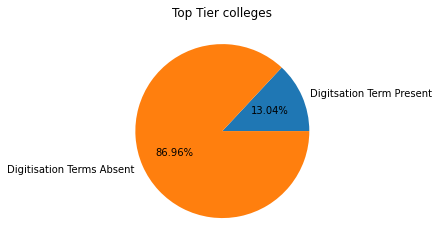

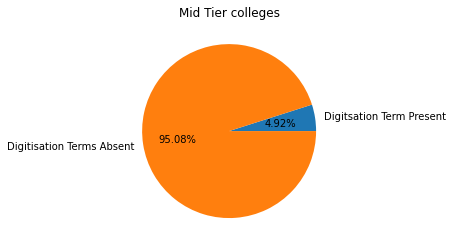

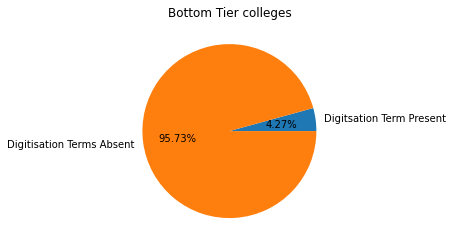

In [96]:
import matplotlib.pyplot as plt

plt.pie([toptierpercent, 1-toptierpercent], labels=[ 'Digitsation Term Present', 'Digitisation Terms Absent'], autopct='%1.2f%%')
# plt.label('Elective Courses')
plt.title('Top Tier colleges')
plt.show()
plt.pie([midtierpercent, 1-midtierpercent], labels=[ 'Digitsation Term Present', 'Digitisation Terms Absent'], autopct='%1.2f%%')
plt.title('Mid Tier colleges')
plt.show()
plt.pie([lowtierpercent, 1-lowtierpercent], labels=[ 'Digitsation Term Present', 'Digitisation Terms Absent'], autopct='%1.2f%%')
plt.title('Bottom Tier colleges')
plt.show()
# plt.label('Core Courses')
# plt.show()

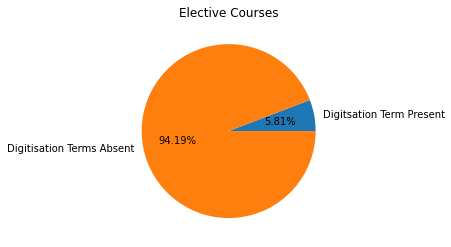

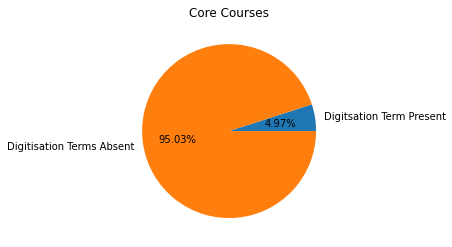

In [97]:
import matplotlib.pyplot as plt

plt.pie([electivepercent, 1-electivepercent], labels=[ 'Digitsation Term Present', 'Digitisation Terms Absent'], autopct='%1.2f%%')
# plt.label('Elective Courses')
plt.title('Elective Courses')
plt.show()
plt.pie([corepercent, 1-corepercent], labels=[ 'Digitsation Term Present', 'Digitisation Terms Absent'], autopct='%1.2f%%')
plt.title('Core Courses')
plt.show()
# plt.label('Core Courses')
# plt.show()

In [98]:
finaldf.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,Digitization Terms,Terms Count
0,30.0,University of Michigan :Ross,Americas,Mid,Undergraduate,Bacholor of Business Administration,TO 433,Artificial Intelligence for Business,Elective,https://michiganross.umich.edu/courses/artific...,artificial intelligence for business --- we ar...,[artificial intelligence],1
1,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,NaN,TO 435,Behavioral Economics and Behavioral Operations,Elective,https://michiganross.umich.edu/courses/behavio...,behavioral economics and behavioral operations...,No Digitization Terms Found,0
2,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,NaN,MO 300,Behavioral Theory in Management,Core,https://michiganross.umich.edu/courses/behavio...,behavioral theory in management --- this cours...,No Digitization Terms Found,0
3,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,NaN,BL 300,Business Law and Ethics,Core,https://michiganross.umich.edu/courses/busines...,business law and ethics --- this is a core cou...,No Digitization Terms Found,0
4,NaN,University of Michigan :Ross,Americas,Mid,Undergraduate,NaN,BL 310,Negotiation and Dispute Resolution,Elective,https://michiganross.umich.edu/courses/negotia...,negotiation and dispute resolution --- the abi...,No Digitization Terms Found,0


In [99]:
digidf = finaldf[(finaldf['Terms Count']>0)]

# Percentage of universities having digitised content

In [100]:
peruni = len(digidf['University Name'].value_counts())/len(finaldf['University Name'].value_counts())

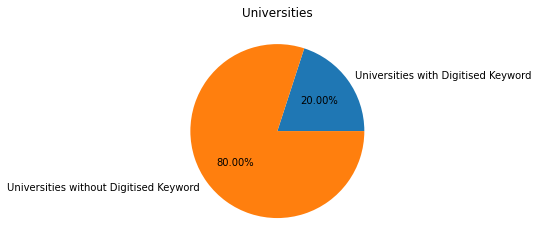

In [101]:
plt.pie([peruni, 1-peruni], labels=[ 'Universities with Digitised Keyword', 'Universities without Digitised Keyword'], autopct='%1.2f%%')
# plt.label('Elective Courses')
plt.title('Universities')
plt.show()

# Percentage of keywords by location [Division by all the university count]

In [102]:
digidf['Location'].value_counts()

Americas    8
Europe      3
Asia        2
Name: Location, dtype: int64

In [103]:
digidf['University Name'].value_counts()

Univesity of Pennsylvania: Wharton School    2
Nanyang Business School, NTU Singapore       2
University of Edinburgh Business School      2
University of Pittsburgh: Katz               2
University of Michigan :Ross                 1
Northeastern University: D'Amore-McKim       1
Miami Herbert Business School                1
MIT Sloan                                    1
University College Dublin: Smurfit           1
Name: University Name, dtype: int64

In [104]:

a = digidf['University Name'].value_counts()

In [105]:
a.index

Index(['Univesity of Pennsylvania: Wharton School',
       'Nanyang Business School, NTU Singapore',
       'University of Edinburgh Business School',
       'University of Pittsburgh: Katz', 'University of Michigan :Ross',
       'Northeastern University: D'Amore-McKim',
       'Miami Herbert Business School', 'MIT Sloan',
       'University College Dublin: Smurfit'],
      dtype='object')

In [106]:
dict={}

In [107]:
#Calculating location of universities having digitised content
for j in a.index:
  print(j)
  location = digidf[digidf['University Name']==j]['Location'].unique()
  # print(location[0])
  print(location[0])
  loc= str(location[0])
  if loc in dict.keys():
    dict[location[0]]=dict[location[0]]+1
  else:
    dict[location[0]]=1
  # print(dict)

Univesity of Pennsylvania: Wharton School
Americas
Nanyang Business School, NTU Singapore
Asia
University of Edinburgh Business School
Europe
University of Pittsburgh: Katz
Americas
University of Michigan :Ross
Americas
Northeastern University: D'Amore-McKim
Americas
Miami Herbert Business School
Americas
MIT Sloan
Americas
University College Dublin: Smurfit
Europe


In [108]:
dict

{'Americas': 6, 'Asia': 1, 'Europe': 2}

In [109]:
newdict={}

In [110]:
for j,k in dict.items():
  newdict[j]= k/len(finaldf['University Name'].value_counts())

In [111]:
newdict

{'Americas': 0.13333333333333333,
 'Asia': 0.022222222222222223,
 'Europe': 0.044444444444444446}

In [112]:
tmp = finaldf['Location'].unique()

In [113]:
for j in tmp:
  if j not in newdict.keys():
    newdict[j]=0

In [114]:
newdict

{'Americas': 0.13333333333333333,
 'Asia': 0.022222222222222223,
 'Australia': 0,
 'Europe': 0.044444444444444446}

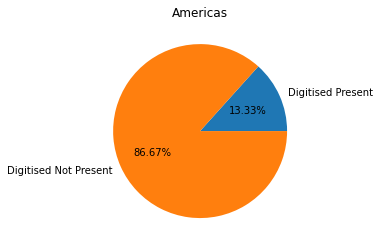

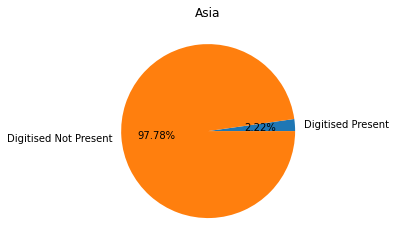

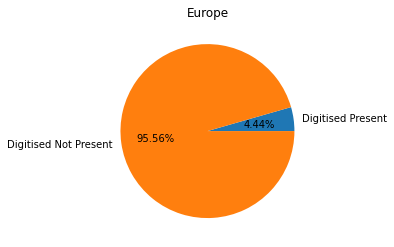

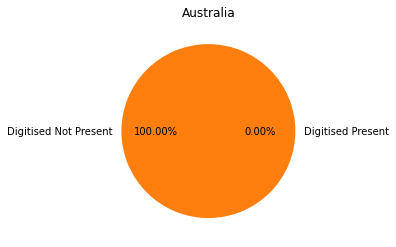

In [115]:
for i, j in newdict.items():
  plt.pie([j, 1-j], labels=[ 'Digitised Present', 'Digitised Not Present'], autopct='%1.2f%%')
# plt.label('Elective Courses')
  plt.title(i)
  plt.show()

Percentage of universities by location [Division by number of univesities / location]

In [116]:
locationdict={}

In [117]:
a = finaldf['University Name'].value_counts()

In [118]:
#Calculating location of universities having digitised content
for j in a.index:
  print(j)
  location = finaldf[finaldf['University Name']==j]['Location'].unique()
  # print(location[0])
  print(location[0])
  loc= str(location[0])
  if loc in locationdict.keys():
    locationdict[location[0]]=locationdict[location[0]]+1
  else:
    locationdict[location[0]]=1
  # print(dict)

Northeastern University: D'Amore-McKim
Americas
Washington University: Olin
Americas
Brigham Young University: Marriott
Americas
University of Texas at Dallas: Jindal
Americas
Texas A & M University: Mays
Americas
Nanyang Business School, NTU Singapore
Asia
AGSM at UNSW Business School
Australia
University of California at Irvine: Merage
Americas
Singapore Management University: Lee Kong Chian
Asia
University of Pittsburgh: Katz
Americas
Georgetown University: McDonough
Americas
University of Notre Dame: Mendoza
Americas
Macquarie Business School
Australia
Warwick Business School
Europe
City University of Hong Kong
Asia
Univesity of Pennsylvania: Wharton School
Americas
University of Connecticut School of Business
Americas
Babson College: Olin
Americas
University of Maryland: Smith
Americas
UC Berkley
Americas
University of Michigan :Ross
Americas
University of Minnesota: Carlson
Americas
NUS Business School
Asia
Boston University: Questrom
Americas
McGill University: Desautels
America

In [119]:
locationdict

{'Americas': 35, 'Asia': 4, 'Australia': 2, 'Europe': 4}

In [120]:
dict

{'Americas': 6, 'Asia': 1, 'Europe': 2}

In [121]:
for j,k in dict.items():
  newdict[j]= k/locationdict[j]

In [122]:
newdict

{'Americas': 0.17142857142857143, 'Asia': 0.25, 'Australia': 0, 'Europe': 0.5}

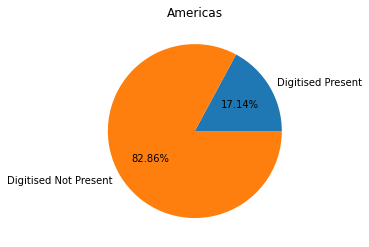

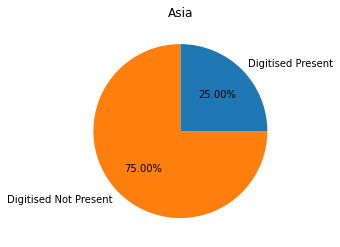

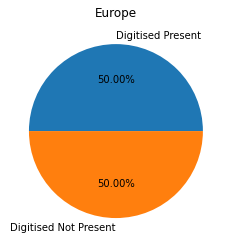

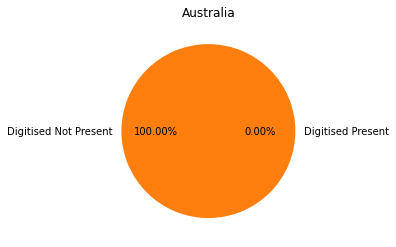

In [123]:
for i, j in newdict.items():
  plt.pie([j, 1-j], labels=[ 'Digitised Present', 'Digitised Not Present'], autopct='%1.2f%%')
# plt.label('Elective Courses')
  plt.title(i)
  plt.show()